### Trying to cluster

In [1]:
import functions

import os
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# for clustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# for statistical tests
from scipy.stats import ttest_rel, ttest_ind
from statsmodels.stats.multitest import multipletests

In [2]:
rsfMRI_info = pd.read_excel("data/TiMeS_rsfMRI_info.xlsx", engine="openpyxl")  
regression_info = pd.read_excel("data/TiMeS_regression_info_processed.xlsx", engine="openpyxl")
rsfMRI_full_info = pd.read_excel("data/TiMeS_rsfMRI_full_info.xlsx", engine="openpyxl")
print(regression_info.columns)
print(rsfMRI_info)
regression_info=regression_info[['Stroke_location', 'Lesion_side', 'lesion_volume_mm3']]

Index(['subject_full_id', 'TimePoint', 'Behavioral_assessment', 'MRI',
       'Gender', 'Age', 'Education_level', 'Lesion_side_old', 'Lesion_side',
       'Combined', 'Bilateral', 'Comments', 'Stroke_location',
       'lesion_volume_mm3', 'NIHSS', 'FAB_abstraction', 'FAB_flexibility',
       'FAB_programmation', 'FAB_sensitivity_to_interference',
       'FAB_inhibitory_control', 'FAB_environmental_autonomy', 'FAB_TOT',
       'Stroop_color_time', 'Stroop_color_error', 'Stroop_words_time',
       'Stroop_words_error', 'Stroop_interference_time',
       'Stroop_interference_error', 'Stroop_index_WC', 'Stroop_index_InC',
       'Digit_forward_SPAN', 'Digit_forward_TOTAL', 'Digit_backward_SPAN',
       'Digit_backward_TOTAL', 'Digit_sequencing_SPAN',
       'Digit_sequencing_TOTAL', 'Digit_TOTAL',
       'Fugl_Meyer_right_UPPER_EXTREMITY', 'Fugl_Meyer_right_WRIST',
       'Fugl_Meyer_right_HAND', 'Fugl_Meyer_right_COORDINATION_SPEED',
       'Fugl_Meyer_right_TOTAL', 'Fugl_Meyer_left_UPPER

In [3]:
# Folder containing the data
folder_path = "FC_matrices_times_wp11/"

# keep only ROIS
rois = [363, 364, 365, 368, 372, 373, 374, 377, 379, 361, 370, 362, 371, 12, 54, 56, 78, 96, 192, 234, 236, 258, 276, 8, 9, 51, 52, 53, 188, 189, 231, 232, 233]
rois = [roi - 1 for roi in rois]

t1_matrices, regression_info, rsfMRI_full_info, t1_subjects = functions.load_data(folder_path, rois, type='t1_only')
all_matrices, regression_info, rsfMRI_full_info, all_subjects = functions.load_data(folder_path, rois, type='all')
t1_t3_matched, regression_info, rsfMRI_full_info, t1_t3_subjects = functions.load_data(folder_path, rois, type='t1_t3_matched')
t1_t4_matched, regression_info, rsfMRI_full_info, t1_t4_subjects = functions.load_data(folder_path, rois, type='t1_t4_matched')
t1_t3_matrices, regression_info, rsfMRI_full_info, t1_t3_subjects = functions.load_data(folder_path, rois, type='t1_t3')
t1_t4_matrices, regression_info, rsfMRI_full_info, t1_t4_subjects = functions.load_data(folder_path, rois, type='t1_t4')
#matrices = functions.matrices_to_wide_df(matrices)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Better to keep T1 and T3 as more subjects have these two !
From now on I'll work with matrices

In [ ]:
print("matrices column names: ", t1_t3_matrices.columns)

matrices column names:  Index(['subject_id', 'T1_matrix', 'T3_matrix', 'subject_full_id',
       'Lesion_side', 'Stroke_location', 'lesion_volume_mm3', 'Gender', 'Age',
       'Education_level', 'Combined', 'Bilateral'],
      dtype='object')


: 

##### Cluster for all matrices

In [ ]:
categorical_cols = ['Lesion_side', 'Stroke_location','Education_level','Combined', 'Bilateral']
numerical_cols = ['lesion_volume_mm3','Age','Gender']

all_matrices_labeled = functions.cluster_and_plot(all_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4, plot=False)
#t1_t3_matrices_labeled = functions.cluster_and_plot(t1_t3_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4, plot=False)
#t1_t4_matrices_labeled = functions.cluster_and_plot(t1_t4_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=4, plot=False)

# NORMAL THAT WE GET THE SAME CLUSTERS FOR ALL TIMEPOINTS
# because we are using the same data for clustering (T1)

Index(['Lesion_side_R', 'Lesion_side_R/L', 'Stroke_location_basal ganglia',
       'Stroke_location_cerebellum', 'Stroke_location_cortical',
       'Stroke_location_cortical (insula)',
       'Stroke_location_insula + basal ganglia', 'Stroke_location_mixed',
       'Stroke_location_pons', 'Stroke_location_pons + medulla oblongata',
       'Stroke_location_subcortical',
       'Stroke_location_subcortical (maybe basal ganglia)',
       'Stroke_location_subcortical + basal ganglia', 'Education_level_2.0',
       'Education_level_3.0', 'Education_level_4.0', 'Education_level_5.0',
       'Education_level_Unknown', 'Combined_Unknown', 'Combined_Yes',
       'Bilateral_Unknown', 'Bilateral_Yes'],
      dtype='object')
Silhouette score: 0.03914940046153651
Cluster 0: ['s063', 's012', 's015', 's082', 's071', 's003', 's033', 's045', 's042', 's080', 's073', 's086']
Cluster 1: ['s004']
Cluster 2: ['s009', 's030', 's039', 's055', 's046', 's070', 's048', 's076', 's074']
Cluster 3: ['s007', 's031',

/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrices[categorical_cols_name] = matrices[categorical_cols_name].fillna('Unknown')  # Handle missing values


: 

Index(['Lesion_side_R', 'Lesion_side_R/L', 'Stroke_location_basal ganglia',
       'Stroke_location_cerebellum', 'Stroke_location_cortical',
       'Stroke_location_cortical (insula)',
       'Stroke_location_insula + basal ganglia', 'Stroke_location_mixed',
       'Stroke_location_pons', 'Stroke_location_pons + medulla oblongata',
       'Stroke_location_subcortical',
       'Stroke_location_subcortical (maybe basal ganglia)',
       'Stroke_location_subcortical + basal ganglia', 'Education_level_2.0',
       'Education_level_3.0', 'Education_level_4.0', 'Education_level_5.0',
       'Education_level_Unknown', 'Combined_Unknown', 'Combined_Yes',
       'Bilateral_Unknown', 'Bilateral_Yes'],
      dtype='object')


/Users/maylismuller/Desktop/EPFL_DOCS/Master/MA4/Project Hummel/uphummel_MA4/functions.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrices[categorical_cols_name] = matrices[categorical_cols_name].fillna('Unknown')  # Handle missing values


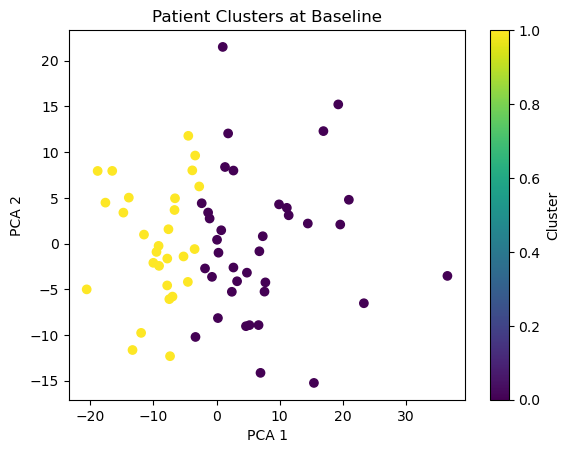

Silhouette score: 0.07789686135710462
Cluster 0: ['s007', 's036', 's062', 's065', 's037', 's039', 's001', 's052', 's063', 's083', 's012', 's015', 's082', 's071', 's047', 's014', 's013', 's025', 's022', 's059', 's068', 's050', 's003', 's060', 's033', 's002', 's029', 's045', 's042', 's080', 's073', 's017', 's021', 's072', 's086', 's081', 's075']
Cluster 1: ['s031', 's009', 's054', 's008', 's030', 's006', 's055', 's041', 's046', 's070', 's048', 's049', 's076', 's078', 's040', 's066', 's057', 's004', 's032', 's051', 's067', 's005', 's027', 's020', 's016', 's011', 's074', 's019']


: 

In [ ]:
t1_t3_matrices_labeled = functions.cluster_and_plot(t1_t3_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=2)

#### Version Chat payant:

Flattening FC matrices on 65 subjects...
[INFO] Missing numerical values detected. Imputing with column means...
Applying PCA...
Testing different cluster numbers...


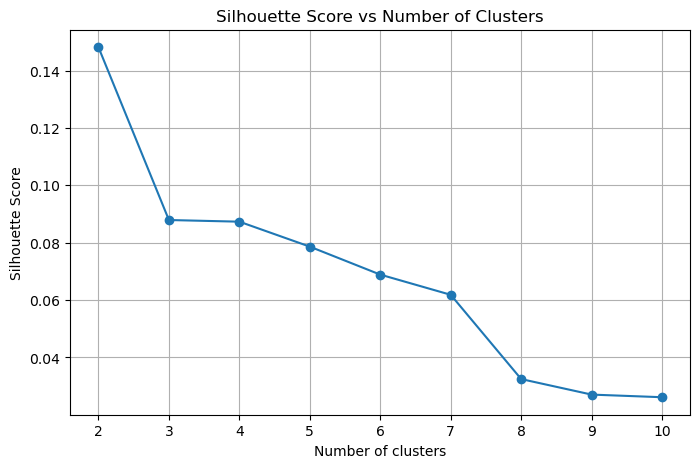

Best number of clusters according to silhouette score: 2


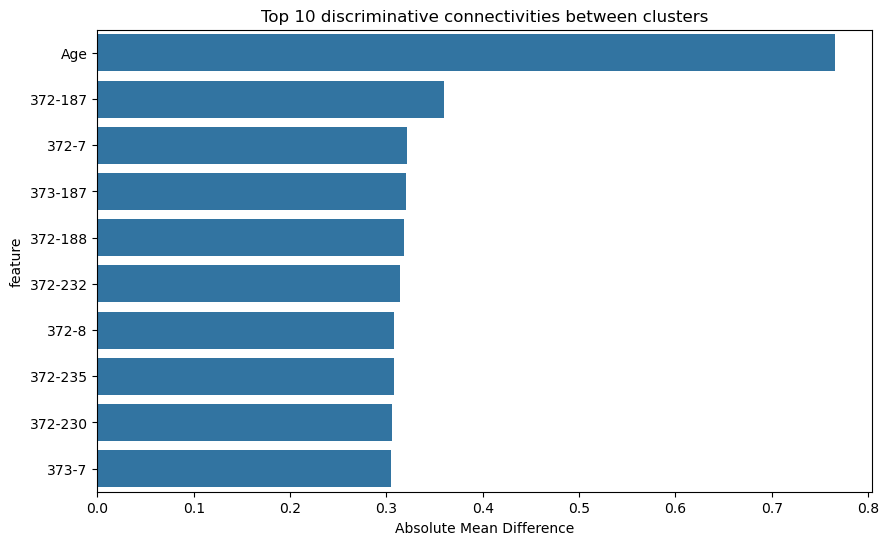

: 

In [ ]:
selected_rois_labels = [362, 363, 364, 367, 371, 372, 373, 376] 

t1_t3_matrices_labeled, clusters, silhouette_scores, pca_features, scaler, pca, all_features, feature_names = functions.cluster_subjects(
    t1_t3_matrices, 
    selected_rois_labels, 
    matrix_column='T1_matrix', 
    numerical_cols=numerical_cols, 
    categorical_cols=categorical_cols
)

importance_df = functions.compute_feature_importance(all_features, clusters, feature_names)

### Beginning of statistical testing


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (10, 37, 37)
Cluster 0 - Shape of T3 matrices: (10, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


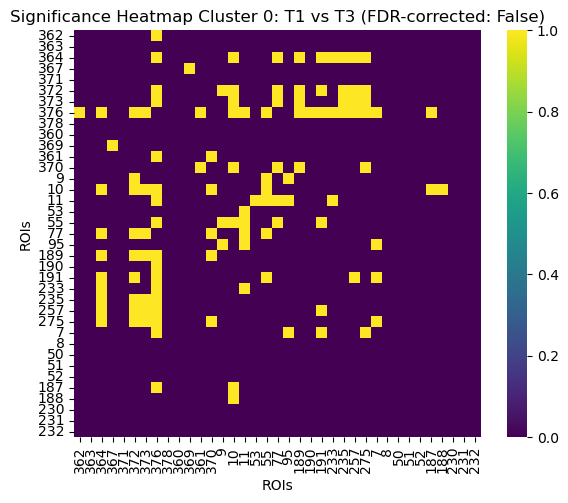


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (29, 37, 37)
Cluster 1 - Shape of T3 matrices: (29, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


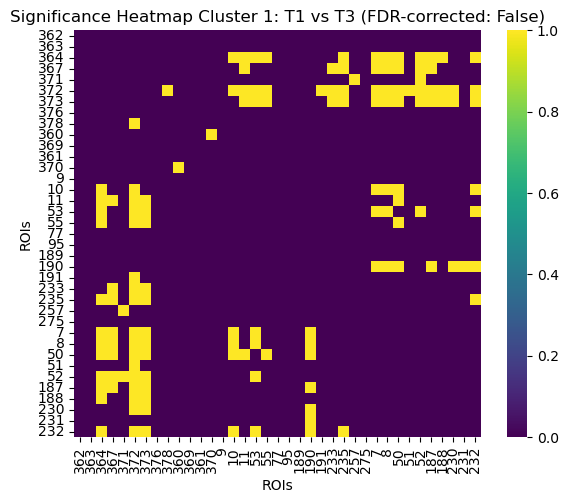

: 

In [ ]:
results = functions.get_sig_matrix(t1_t3_matrices_labeled, rois, correction=False, alpha=0.05, cluster=True)


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (10, 37, 37)
Cluster 0 - Shape of T3 matrices: (10, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


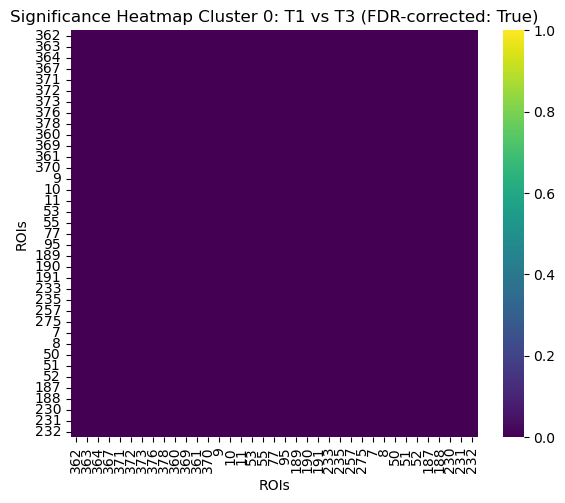


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (29, 37, 37)
Cluster 1 - Shape of T3 matrices: (29, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


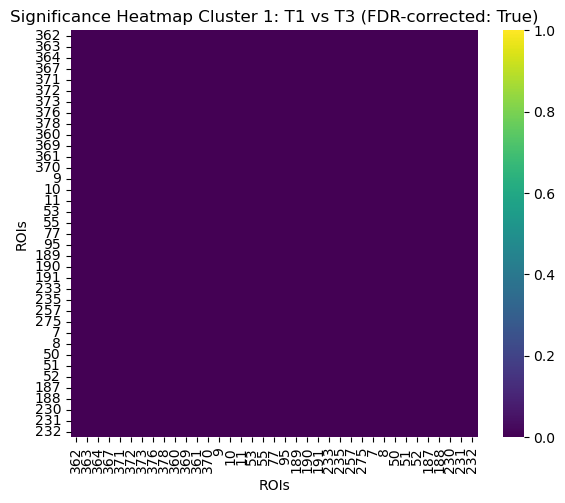

: 

In [ ]:
results = functions.get_sig_matrix(t1_t3_matrices_labeled, rois, correction=True, alpha=0.05, cluster=True)


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (19, 37, 37)
Cluster 0 - Shape of T4 matrices: (19, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


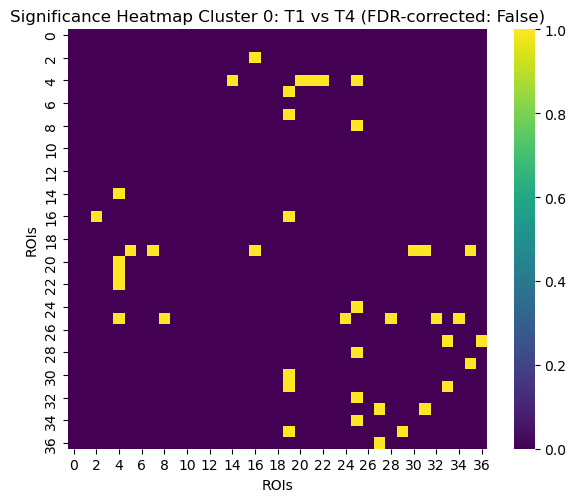


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (17, 37, 37)
Cluster 1 - Shape of T4 matrices: (17, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


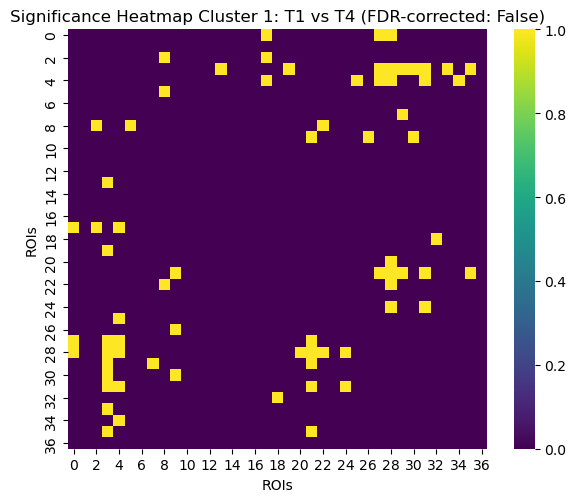

: 

In [ ]:
results = functions.get_sig_matrix(t1_t4_matrices_labeled, tp=4, correction=False, alpha=0.05, cluster=True)

Shape of T1 matrices: (65, 37, 37)
Shape of T3 matrices: (44, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


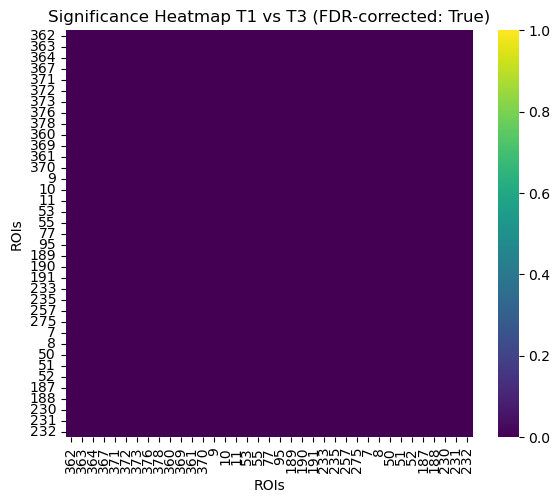

Shape of T1 matrices: (65, 37, 37)
Shape of T3 matrices: (44, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


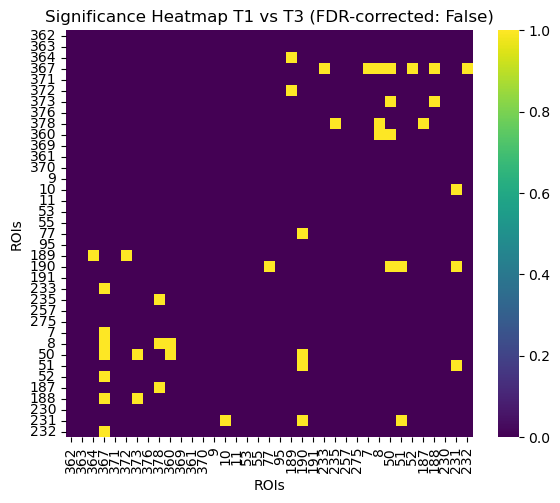


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (19, 37, 37)
Cluster 0 - Shape of T4 matrices: (19, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


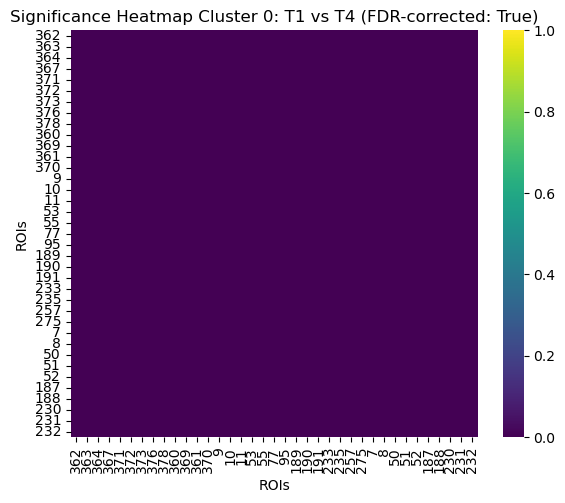


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (17, 37, 37)
Cluster 1 - Shape of T4 matrices: (17, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


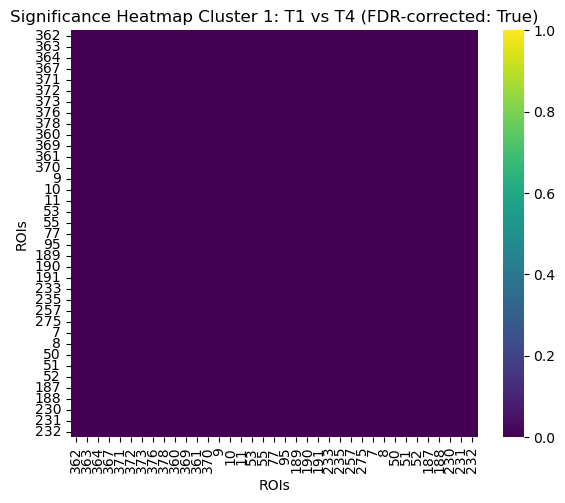


Analyzing Cluster 0...
Cluster 0 - Shape of T1 matrices: (19, 37, 37)
Cluster 0 - Shape of T4 matrices: (19, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


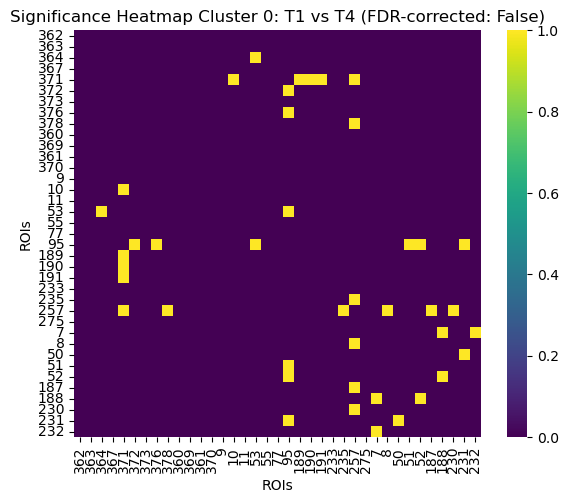


Analyzing Cluster 1...
Cluster 1 - Shape of T1 matrices: (17, 37, 37)
Cluster 1 - Shape of T4 matrices: (17, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


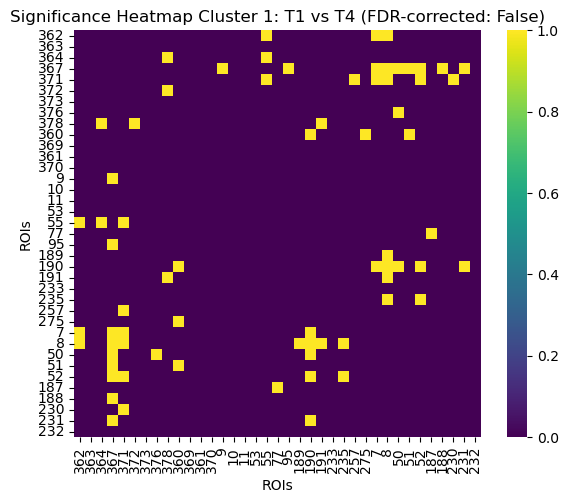

Shape of T1 matrices: (65, 37, 37)
Shape of T4 matrices: (42, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


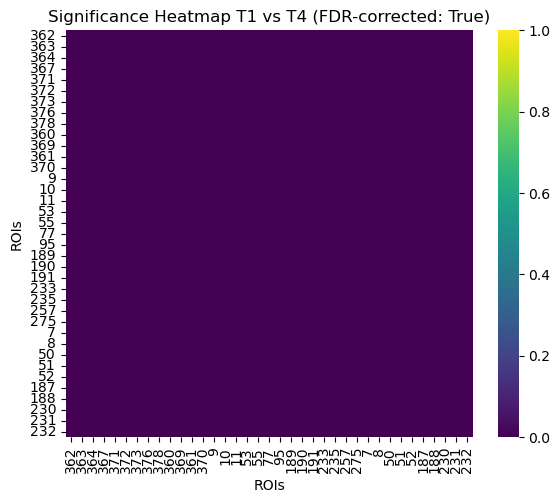

Shape of T1 matrices: (65, 37, 37)
Shape of T4 matrices: (42, 37, 37)


/Users/maylismuller/opt/anaconda3/envs/ada/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


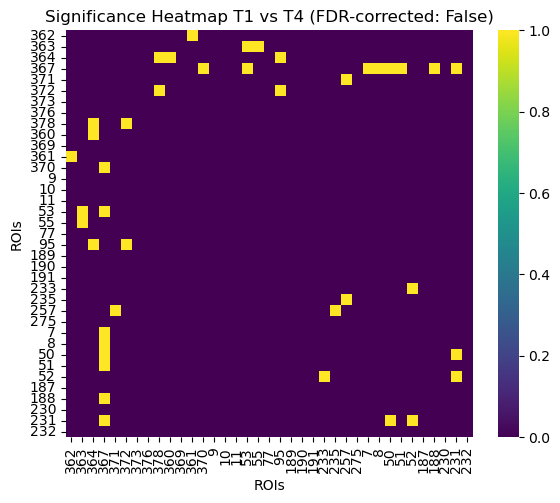

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[       nan, 0.25551029, 0.4015783 , ..., 0.64122593, 0.62244395,
         0.34159699],
        [0.25551029,        nan, 0.52060866, ..., 0.34481731, 0.26292186,
         0.87332444],
        [0.4015783 , 0.52060866,        nan, ..., 0.16426855, 0.37499409,
         0.09500018],
        ...,
        [0.64122593, 0.34481731, 0.16426855, ...,        nan, 0.55472845,
         0.6415112 ],
        [0.62244395, 0.26292186, 0.37499409, ..., 0.55472845,        nan,
         0.50564467],
        [0.34159699, 0.87332444, 0.09500018, ..., 0.6415112 , 0.50564467,
                nan]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [Fal

: 

In [ ]:
functions.get_sig_matrix(t1_t3_matrices, rois, tp=3, correction=True, alpha=0.05, cluster=False)
functions.get_sig_matrix(t1_t3_matrices, rois, tp=3, correction=False, alpha=0.05, cluster=False)
functions.get_sig_matrix(t1_t4_matrices_labeled, rois, tp=4, correction=True, alpha=0.05, cluster=True)
functions.get_sig_matrix(t1_t4_matrices_labeled, rois, tp=4, correction=False, alpha=0.05, cluster=True)
functions.get_sig_matrix(t1_t4_matrices, rois, tp=4, correction=True, alpha=0.05, cluster=False)
functions.get_sig_matrix(t1_t4_matrices, rois, tp=4, correction=False, alpha=0.05, cluster=False)

#### Code to do it by cluster for both T3 and T4

In [ ]:
functions.sig_matrix_T1_T(t1_t4_matrices_labeled, rois, tp = 4, alpha=0.05, cluster = True)

: 

In [ ]:
functions.sig_matrix_T1_T(t1_t3_matrices_labeled, rois, tp = 3, alpha=0.05, cluster = True)

: 

In [ ]:
t1_t3_matrices_labeled = functions.cluster_and_plot(t1_t3_matrices, numerical_cols_names= numerical_cols, categorical_cols_name=categorical_cols, clusters=2)
functions.compare_T1_T_by_cluster(t1_t3_matrices_labeled, rois, tp = 3, alpha=0.05, cluster = True)

: 

### Look at difference between FC

In [ ]:
functions.compute_FC_diff(t1_t3_matrices_labeled, tp = 3)

: 

In [ ]:
functions.plot_mean_FC_matrices(all_matrices, rois)


: 

### Regression Analysis

: 